## Innerwear Data from Victoria's Secret and others

The data is from popular retail sites
Time period is one month: Between June 2017 and July 2017

Columns and Meanings
* product_name: name of the product
* mrp: market price of the product
* price: price of the product
* pdp_url: product url
* brand_name: name of the brand
* product_category: category of the product
* retailer: Name of the retailer
* description: the description of the product
* rating: rating of the product
* review_count: number of reviews on the product

## Data Cleaning and Manipulation

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the data
aerie = pd.read_csv('/home/christine/Downloads/innerwear data/ae_com.csv')
macys = pd.read_csv('/home/christine/Downloads/innerwear data/macys_com.csv')
amazon = pd.read_csv('/home/christine/Downloads/innerwear data/amazon_com.csv')
topshop = pd.read_csv('/home/christine/Downloads/innerwear data/us_topshop_com.csv')
btemped = pd.read_csv('/home/christine/Downloads/innerwear data/btemptd_com.csv')
hankypanky = pd.read_csv('/home/christine/Downloads/innerwear data/hankypanky_com.csv')
calvinklein = pd.read_csv('/home/christine/Downloads/innerwear data/calvinklein_com.csv')
shop_nordstom = pd.read_csv('/home/christine/Downloads/innerwear data/shop_nordstrom_com.csv')
victoriasecret = pd.read_csv('/home/christine/Downloads/innerwear data/victoriassecret_com.csv')

#a deeper look at the datasets
#list of the datasets
data = [aerie,macys,amazon,topshop,btemped,hankypanky,calvinklein,shop_nordstom,victoriasecret]

#iterate over the list to see how the data looks like
for i,data in enumerate(data,start=1):
    print(f"columns of DataFrame {i}:")
    print(data.columns.tolist())
    print()




columns of DataFrame 1:
['product_name', 'mrp', 'price', 'pdp_url', 'brand_name', 'product_category', 'retailer', 'description', 'rating', 'review_count', 'style_attributes', 'total_sizes', 'available_size', 'color']

columns of DataFrame 2:
['product_name', 'mrp', 'price', 'pdp_url', 'brand_name', 'product_category', 'retailer', 'description', 'rating', 'review_count', 'style_attributes', 'total_sizes', 'available_size', 'color']

columns of DataFrame 3:
['product_name', 'mrp', 'price', 'pdp_url', 'brand_name', 'product_category', 'retailer', 'description', 'rating', 'review_count', 'style_attributes', 'total_sizes', 'available_size', 'color']

columns of DataFrame 4:
['product_name', 'mrp', 'price', 'pdp_url', 'brand_name', 'product_category', 'retailer', 'description', 'rating', 'review_count', 'style_attributes', 'total_sizes', 'available_size', 'color']

columns of DataFrame 5:
['product_name', 'mrp', 'price', 'pdp_url', 'brand_name', 'product_category', 'retailer', 'description',

In [3]:
for i, d in enumerate(data, start=1):
    print(f"Type of DataFrame {i}:")
    print(data.dtypes)
    print()


Type of DataFrame 1:
product_name         object
mrp                  object
price                object
pdp_url              object
brand_name           object
product_category     object
retailer             object
description          object
rating              float64
review_count        float64
style_attributes    float64
total_sizes          object
available_size       object
color                object
dtype: object

Type of DataFrame 2:
product_name         object
mrp                  object
price                object
pdp_url              object
brand_name           object
product_category     object
retailer             object
description          object
rating              float64
review_count        float64
style_attributes    float64
total_sizes          object
available_size       object
color                object
dtype: object

Type of DataFrame 3:
product_name         object
mrp                  object
price                object
pdp_url              object
brand_name 

In [4]:
#iterate over the dataframe and print the first two rows
for i, d in enumerate(data,start=1):
    print(f"columns of Dataframe {i}:")
    print(data.head(2))
    print()

columns of Dataframe 1:
                         product_name      mrp    price  \
0  Very Sexy Strappy Lace Thong Panty  $14.50   $14.50    
1  Very Sexy Strappy Lace Thong Panty  $14.50   $14.50    

                                             pdp_url         brand_name  \
0  https://www.victoriassecret.com/panties/shop-a...  Victoria's Secret   
1  https://www.victoriassecret.com/panties/shop-a...  Victoria's Secret   

           product_category            retailer  \
0  Strappy Lace Thong Panty  Victoriassecret US   
1  Strappy Lace Thong Panty  Victoriassecret US   

                                         description  rating  review_count  \
0  Lots of cheek peek, pretty lace, a strappy bac...     NaN           NaN   
1  Lots of cheek peek, pretty lace, a strappy bac...     NaN           NaN   

   style_attributes                  total_sizes available_size        color  
0               NaN  ["XS", "S", "M", "L", "XL"]              S  peach melba  
1               NaN  ["XS

## Concat the Datasets

In [5]:
#concat the data
dataset = pd.concat([aerie,macys,amazon,topshop,btemped,hankypanky,calvinklein,shop_nordstom,victoriasecret])

#print the shape of the dataset to see the number of rows and columns
print(dataset.shape)

(613143, 14)


## Check for null values

In [6]:
#check if you have null values
null_values = dataset.isnull().sum()
print(f"missing values before handling them :",null_values)


#take care of the missing values
#forwad fill the null values with the most popular price in the category
dataset['mrp'] = dataset.groupby('product_category')['mrp'].transform(lambda x: x.fillna(x.mode()[0]))
dataset['price'] = dataset.groupby('product_category')['mrp'].transform(lambda x: x.fillna(x.mode()[0]))

#print after dealing with the missing values
print("\n")
null_values=dataset.isnull().sum()
print(f"missing values after handling them:",null_values)

missing values before handling them : product_name             0
mrp                      0
price                    0
pdp_url                  0
brand_name               0
product_category         0
retailer                 0
description              0
rating              379587
review_count        391113
style_attributes    456468
total_sizes              0
available_size           0
color                  677
dtype: int64


missing values after handling them: product_name             0
mrp                      0
price                    0
pdp_url                  0
brand_name               0
product_category         0
retailer                 0
description              0
rating              379587
review_count        391113
style_attributes    456468
total_sizes              0
available_size           0
color                  677
dtype: int64


## Remove the dollar sign

In [8]:

#we standardize the price values
#remove the dollar sign from mrp column

dataset['mrp'] = dataset['mrp'].str.replace('^\$"|USD','',regex=True)

#strip the dollar sign and usd from amount2 column
dataset.price = dataset['price'].str.replace('^\$|USD','',regex=True)

#print out the output
print(dataset[['mrp','price']].head(2))
print('\n')
print(dataset[['mrp','price']].head())


      mrp   price
0  12.50   12.50 
1  12.50   12.50 


      mrp   price
0  12.50   12.50 
1  12.50   12.50 
2  12.50   12.50 
3  12.50   12.50 
4  12.50   12.50 


In [15]:
#we can change the columns to kenya shilling
#exchange rate from usd to kes
# Define the exchange rate from USD to KES
exchange_rate = 138.50

# Convert 'mrp' and 'price' columns to numeric
cols = ['mrp', 'price']
dataset[cols] = dataset[cols].apply(pd.to_numeric, errors='coerce')

# Convert USD to KES
dataset['mrp_ksh'] = dataset['mrp'] * exchange_rate
dataset['price_ksh'] = dataset['price'] * exchange_rate

# Print the dataset's columns
print(dataset.columns)

Index(['product_name', 'mrp', 'price', 'pdp_url', 'brand_name',
       'product_category', 'retailer', 'description', 'rating', 'review_count',
       'style_attributes', 'total_sizes', 'available_size', 'color', 'mrp_ksh',
       'price_ksh'],
      dtype='object')


In [20]:
#print the brandnames
dataset['brand_name'].unique()

array(['AERIE', 'AEO', 'Calvin Klein', 'Wacoal', 'Hanky Panky',
       "b.tempt'd by Wacoal", 'Calvin Klein Modern Cotton', 'Vanity Fair',
       'Calvin Klein Performance', "b.tempt'd", 'Calvin-Klein',
       'Hanky-Panky', 'b-temptd', 'Victorias-Secret', 's',
       'ref=w_bl_sl_l_ap_ap_web_2586685011?ie=UTF8&node=2586685011&field-lbr_brands_browse-bin=Calvin+Klein',
       'ref=w_bl_sl_l_b_ap_web_2586451011?ie=UTF8&node=2586451011&field-lbr_brands_browse-bin=b.tempt%27d',
       'Fila', 'Lucky-Brand',
       'ref=w_bl_sl_l_b_ap_web_2603426011?ie=UTF8&node=2603426011&field-lbr_brands_browse-bin=Wacoal',
       'Creative-Motion', 'Sexy-Hair', 'Nintendo', 'Compression-Comfort',
       'US TOPSHOP', 'WACOAL', 'HankyPanky', 'HANKY PANKY',
       "B.TEMPT'D BY WACOAL", 'CALVIN KLEIN', 'NORDSTROM LINGERIE',
       "Victoria's Secret", "Victoria's Secret Pink"], dtype=object)

AxesSubplot(0.125,0.125;0.775x0.755)


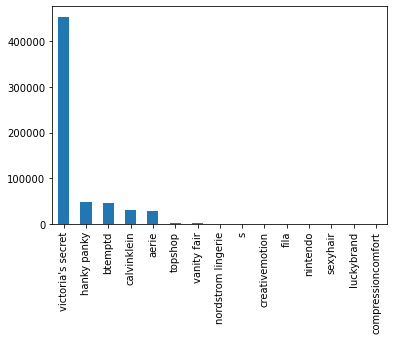

In [22]:
# remove the duplicates
def standard_names(brand_name):
    brand_name = brand_name.lower()
    brand_name = brand_name.replace('-','')
    brand_name = brand_name.replace('+','')
    brand_name = brand_name.replace('.','')

    if 'hanky' in brand_name:
        brand_name = 'hanky panky'
    elif 'calvin' in brand_name:
        brand_name = 'calvinklein'
    elif 'victoria' in brand_name:
        brand_name = "victoria's secret"
    elif 'tempt' in brand_name or 'wacoal' in brand_name:
        brand_name = 'btemptd'
    elif 'nordstorm' in brand_name:
        brand_name = 'nordstorm'
    elif 'topshop' in brand_name:
        brand_name = 'topshop'
    elif 'aeo' in brand_name:
        brand_name = 'aerie'
    elif 'victorias' in brand_name:
        brand_name = "victoria's secret"
    brand_name = brand_name.strip()
    return brand_name
dataset['brand_name'] = dataset['brand_name'].apply(standard_names)

#print the brand names to see the changes
print(pd.value_counts(dataset['brand_name']).plot.bar())

## Reduce product categories

In [23]:
#brand names
print('The categories before changing to lower case',dataset.product_category.nunique())

print('^\n')

#change the column into lower case
dataset.product_category = dataset['product_category'].str.lower()

# check the unique values
print('The categories after changing to lower case', dataset['product_category'].nunique())

print('^\n')

print(dataset['product_category'].value_counts().head(40))

The categories before changing to lower case 525
^

The categories after changing to lower case 520
^

demi bra                                              39865
push-up bra                                           36452
bras                                                  31137
perfect coverage bra                                  24762
incredible by victoria sport bra                      19437
women - lingerie & shapewear - designer lingerie      18893
wear everywhere push-up bra                           17438
collections                                           16768
perfect shape bra                                     15557
knockout by victoria sport front-close sport bra      14887
panties                                               13011
women - lingerie & shapewear - panties                10592
thongs                                                 9980
wear everywhere t-shirt bra                            9812
incredible by victoria sport front-close sport bra     97

In [25]:
#create a dictionary to create category mappings
mappings = {'demi bra':'bra','push up bra': 'bra','bras':'bra','perfect coverage bra':'bra','incredibe by victoria sport bra': 'bra'\
            ,'women -lingerie & shapewear - designer lingerie':'lingerie','wear everywhere push-up bra':'bra','collections':'collections','perfect shape bra':'bra'\
                ,'knockout by victoria sport front-close sport bra':'bra','panties':'panties','women-lingerie & shapewear-panties':'panties','thongs':'lingerie','wear everywhere t-shirt bra':'bra','incredible by victoria sport front-close sport bra':'bra'\
                    ,'women-lingerie & shapewear bras':'bra','multi-way bra': 'bra','wear everywhere lightly lined bra':'bra','lightweight by victoria sport bra':'bra'}

#create a column for the new updated ones
dataset['categories'] = dataset['product_category'].apply(lambda x: mappings.get(x,x))

In [26]:
#final review
dataset.head()

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,mrp_ksh,price_ksh,categories
0,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,aerie,cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Rugged Green,1731.25,1731.25,cheekies
1,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,aerie,cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Natural Nude,1731.25,1731.25,cheekies
2,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,aerie,cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",True Black,1731.25,1731.25,cheekies
3,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,aerie,cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",White,1731.25,1731.25,cheekies
4,Aerie Everyday Loves Lace Cheeky,12.5,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,aerie,cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Royal Navy,1731.25,1731.25,cheekies


In [27]:
dataset.describe(include='all')

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,mrp_ksh,price_ksh,categories
count,613143,28328.000000,609380.000000,613143,613143,613143,613143,613143,233556.000000,2.220300e+05,156675,613143,613143,612466,28328.000000,609380.000000,613143
unique,2819,NaN,NaN,12298,15,520,9,3444,NaN,NaN,2786,965,7566,2557,NaN,NaN,509
top,Body by Victoria Perfect Coverage Bra,NaN,NaN,https://www.victoriassecret.com/bras/shop-all-...,victoria's secret,demi bra,Victoriassecret US,Our fullest coverage and our sexiest comfort m...,NaN,NaN,"[""One-size thong in our signature stretch lace...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,Black,NaN,NaN,bra
freq,17922,NaN,NaN,4531,453453,39865,453386,18529,NaN,NaN,1073,100286,30470,36959,NaN,NaN,184753
mean,NaN,22.822207,36.305046,NaN,NaN,NaN,NaN,NaN,4.254360,5.708913e+35,NaN,NaN,NaN,NaN,3160.875719,5028.248827,NaN
std,NaN,13.026553,17.683579,NaN,NaN,NaN,NaN,NaN,0.527576,9.170288e+36,NaN,NaN,NaN,NaN,1804.177552,2449.175747,NaN
min,NaN,7.500000,6.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000e+00,NaN,NaN,NaN,NaN,1038.750000,831.000000,NaN
25%,NaN,11.500000,24.500000,NaN,NaN,NaN,NaN,NaN,4.000000,1.600000e+01,NaN,NaN,NaN,NaN,1592.750000,3393.250000,NaN
50%,NaN,22.950000,35.000000,NaN,NaN,NaN,NaN,NaN,4.300000,9.700000e+01,NaN,NaN,NaN,NaN,3178.575000,4847.500000,NaN
75%,NaN,29.950000,48.000000,NaN,NaN,NaN,NaN,NaN,4.500000,3.860000e+02,NaN,NaN,NaN,NaN,4148.075000,6648.000000,NaN


## Ready to do some analysis!!